<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Import-and-Describe-the-Dataset" data-toc-modified-id="Challenge-1---Import-and-Describe-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Import and Describe the Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?" data-toc-modified-id="Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the dataset with mathematical and visualization techniques. What do you find?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Data-Cleaning-and-Transformation" data-toc-modified-id="Challenge-2---Data-Cleaning-and-Transformation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Data Cleaning and Transformation</a></span></li><li><span><a href="#Challenge-3---Data-Preprocessing" data-toc-modified-id="Challenge-3---Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Data Preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here." data-toc-modified-id="We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>We will use the <code>StandardScaler</code> from <code>sklearn.preprocessing</code> and scale our data. Read more about <code>StandardScaler</code> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler" target="_blank">here</a>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Data-Clustering-with-K-Means" data-toc-modified-id="Challenge-4---Data-Clustering-with-K-Means-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Data Clustering with K-Means</a></span></li><li><span><a href="#Challenge-5---Data-Clustering-with-DBSCAN" data-toc-modified-id="Challenge-5---Data-Clustering-with-DBSCAN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Data Clustering with DBSCAN</a></span></li><li><span><a href="#Challenge-6---Compare-K-Means-with-DBSCAN" data-toc-modified-id="Challenge-6---Compare-K-Means-with-DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Compare K-Means with DBSCAN</a></span></li><li><span><a href="#Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters" data-toc-modified-id="Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge 2 - Changing K-Means Number of Clusters</a></span></li><li><span><a href="#Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples" data-toc-modified-id="Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bonus Challenge 3 - Changing DBSCAN <code>eps</code> and <code>min_samples</code></a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [2]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA        
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [3]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
%matplotlib inline


In [4]:
import pandas as pd
wholesale = pd.read_csv(r"C:\Users\alvar\Downloads\Wholesale customers data.csv")
print("\nFirst rows:")
wholesale.head()


First rows:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [5]:
wholesale.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
wholesale.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [7]:
wholesale.isnull().sum()


Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [8]:
wholesale.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

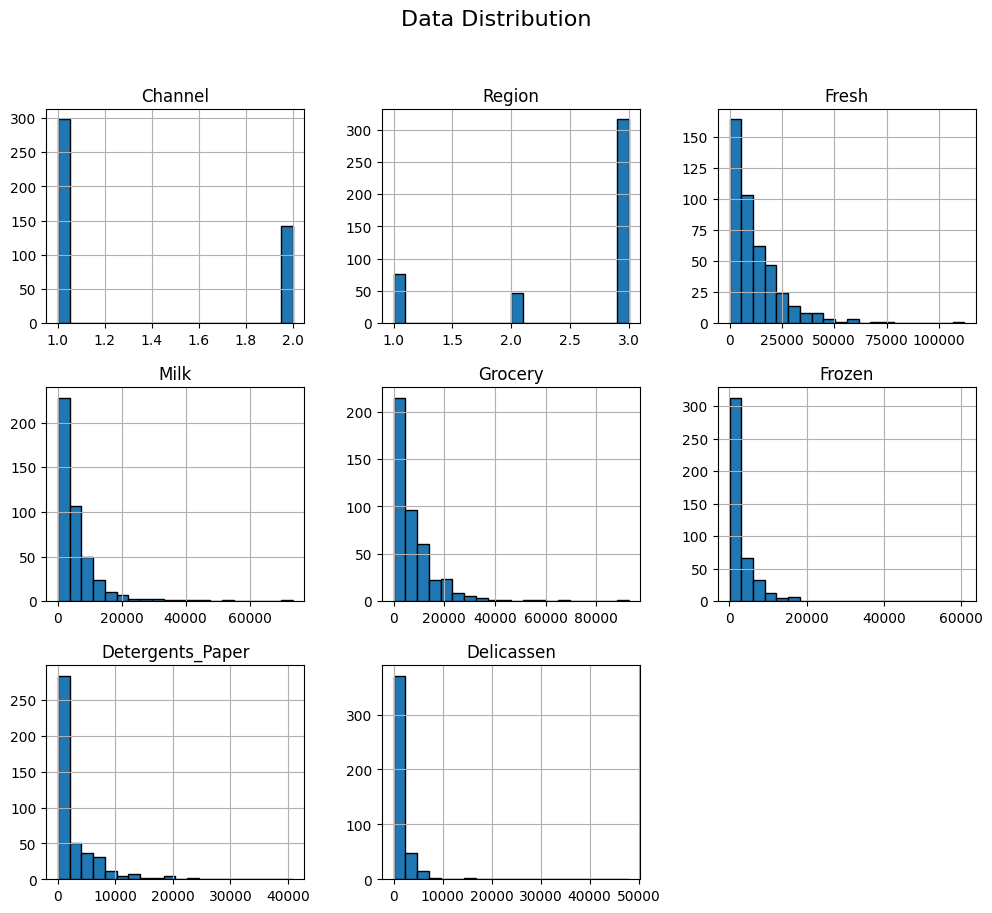

In [9]:
# Data Distribution
wholesale.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle('Data Distribution', fontsize=16)
plt.show()

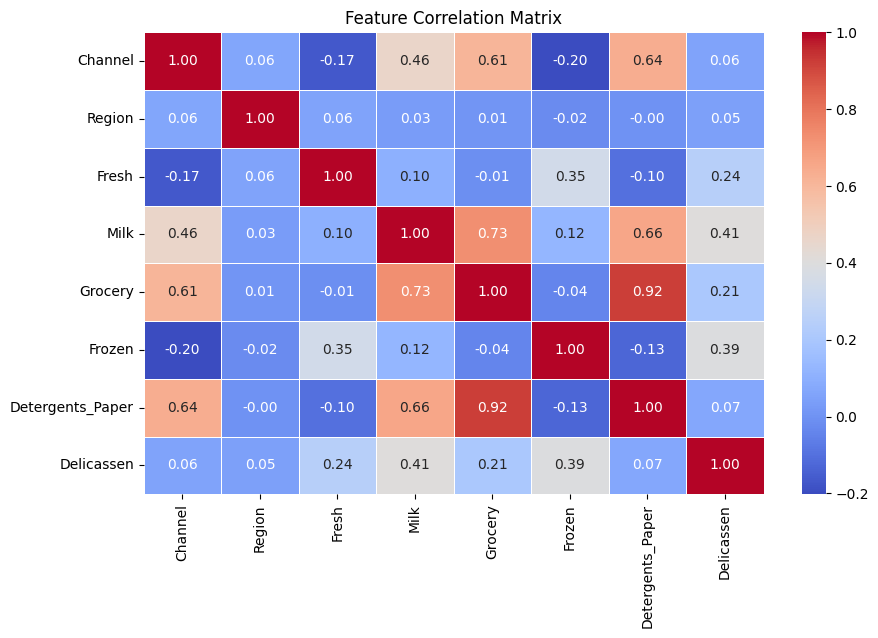

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = wholesale.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


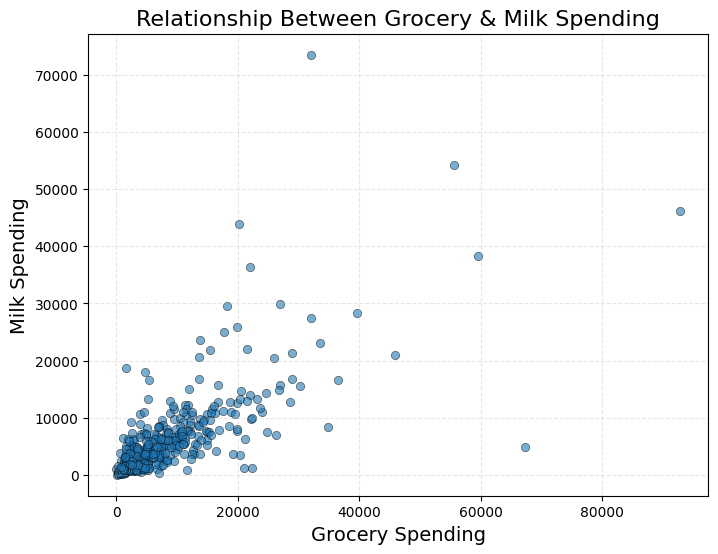

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(8, 6))

# Create scatter plot with improved styling
sns.scatterplot(data=wholesale, x="Grocery", y="Milk", alpha=0.6, edgecolor="black")

# Improve labels and title
plt.xlabel("Grocery Spending", fontsize=14)
plt.ylabel("Milk Spending", fontsize=14)
plt.title("Relationship Between Grocery & Milk Spending", fontsize=16)

# Show grid for better readability
plt.grid(True, linestyle="--", alpha=0.3)

# Show the plot
plt.show()


**Your observations here**

- ex.: Frozen, Grocery, Milk and Detergents Paper have a high...
- ...



In [12]:
#The max values for Fresh, Milk, Grocery, Frozen, Detergents_Paper, and Delicassen are significantly higher than their 75% percentile (Q3). Possible outliers detected
#Standard deviation (std) is large compared to the mean. Skewed Distributions (High Standard Deviations)
#Channel and Region are categorical, might need one-hot encoding if used in ML models.

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

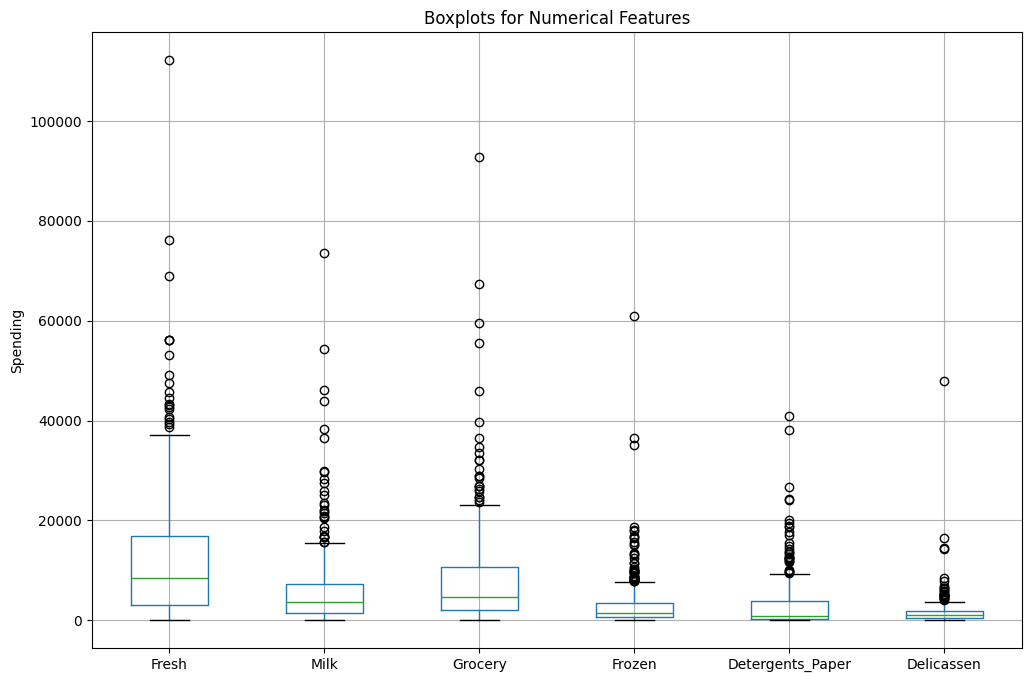

In [13]:
# Outlier Detection with Boxplots
plt.figure(figsize=(12, 8))
wholesale.boxplot(column=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'])
plt.title('Boxplots for Numerical Features')
plt.ylabel('Spending')
plt.show()

In [14]:
# Outlier Treatment (Capping at 99th percentile)
numeric_columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
for col in numeric_columns:
    upper_limit = np.percentile(wholesale[col], 99)  # 99th percentile
    wholesale[col] = np.where(wholesale[col] > upper_limit, upper_limit, wholesale[col])
# Log Transformation to Reduce Skewness
# Apply log transformation to numerical columns
data_log_transformed = wholesale.copy()
for col in numeric_columns:
    data_log_transformed[col] = np.log1p(wholesale[col])  # log(1 + x) to handle zeros

# Check transformed data
print("First 5 rows after cleaning and transformation:")
print(data_log_transformed.head())

First 5 rows after cleaning and transformation:
   Channel  Region      Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
0        2       3   9.446992  9.175438  8.930891  5.370638          7.891705   
1        2       3   8.861917  9.191259  9.166284  7.474772          8.099858   
2        2       3   8.756840  9.083529  8.947026  7.785721          8.165364   
3        1       3   9.492960  7.087574  8.348064  8.764834          6.230481   
4        2       3  10.026413  8.596189  8.881697  8.272826          7.483244   

   Delicassen  
0    7.199678  
1    7.482682  
2    8.967632  
3    7.489412  
4    8.553718  


**Your comment here**

-  ...
-  ...

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

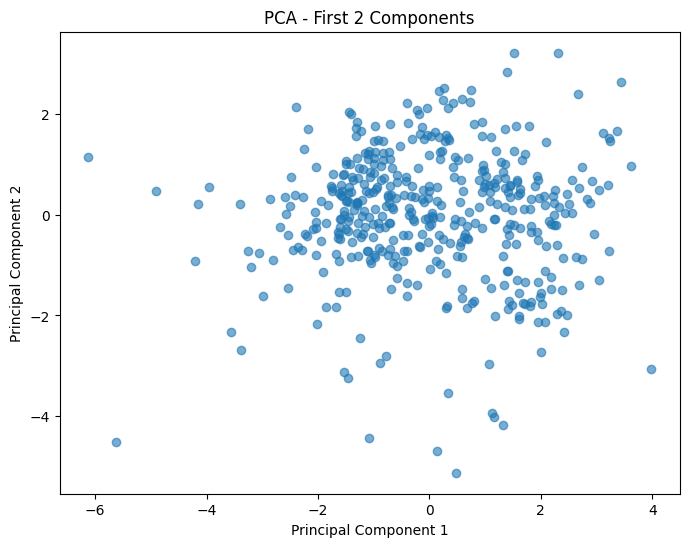

PCA Explained Variance Ratio: [0.44089856 0.26944497]
Data transformation completed successfully.


In [15]:
# Scaling the Data
scaler = StandardScaler()
customers_scale = scaler.fit_transform(data_log_transformed[numeric_columns])

# Dimensionality Reduction (Optional: PCA to address collinearity)
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_transformed = pca.fit_transform(customers_scale)

# Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_

# Plot PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], alpha=0.6)
plt.title('PCA - First 2 Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Summary of Transformation
print("PCA Explained Variance Ratio:", explained_variance)
print("Data transformation completed successfully.")




# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [16]:
from sklearn.cluster import KMeans
from sklearn import datasets
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer
import distutils


# Load the cleaned and preprocessed dataset (scaled data)
# Assuming 'customers_scale' is the scaled data from preprocessing
customers_scale = pd.DataFrame(customers_scale, columns=numeric_columns)

# Step 1: Initialize the K-Means model
# Based on the previous analysis the clusters will be 2
kmeans = KMeans(n_clusters=2, random_state=42)

# Step 2: Fit the K-Means model to the scaled data
kmeans.fit(customers_scale)

# Step 3: Retrieve the cluster labels
customers_scale['labels'] = kmeans.labels_

# Step 4: Assign labels back to the original data (optional)
# Assuming 'data' is the original dataset
wholesale['labels'] = kmeans.labels_

# Step 5: Display the results
print("Cluster Labels Assigned to Customers:")
print(wholesale[['labels']].head())

# Step 6: Analyze Cluster Distribution
print("\nCluster Distribution:")
print(wholesale['labels'].value_counts())

Cluster Labels Assigned to Customers:
   labels
0       1
1       1
2       1
3       0
4       1

Cluster Distribution:
labels
0    249
1    191
Name: count, dtype: int64


c:\Users\alvar\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\alvar\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\alvar\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\alvar\AppData\Local\Programs\Python\Python313\Lib\subprocess.py

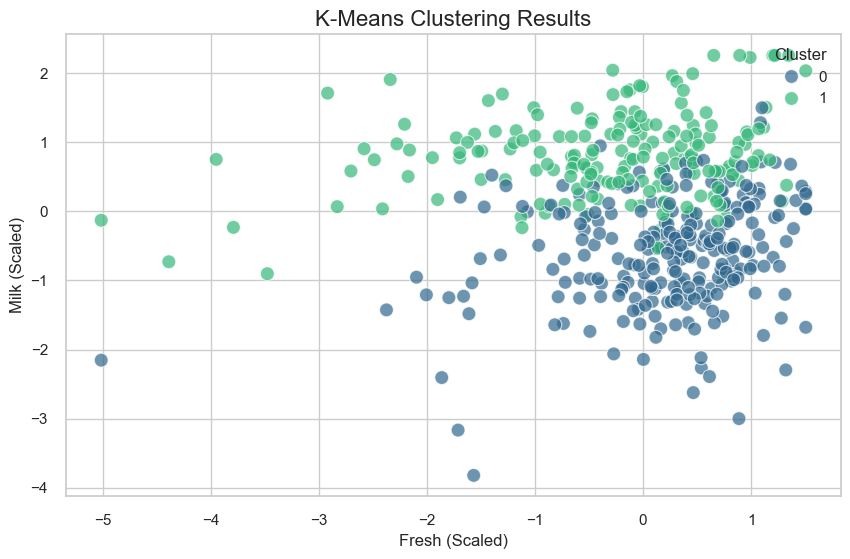

In [17]:
# Visualize the clusters using PCA (2D projection of scaled data)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create a scatter plot of the first two main features
sns.scatterplot(
    x=customers_scale['Fresh'], 
    y=customers_scale['Milk'], 
    hue=customers_scale['labels'], 
    palette="viridis", 
    s=100, 
    alpha=0.7
)

plt.title('K-Means Clustering Results', fontsize=16)
plt.xlabel('Fresh (Scaled)', fontsize=12)
plt.ylabel('Milk (Scaled)', fontsize=12)
plt.legend(title='Cluster', loc='upper right')
plt.show()

### Looking to the elbow we can choose 2 like the correct number of clusters

In [18]:
kmeans_2 = KMeans(n_clusters=2).fit(customers_scale)

labels = kmeans_2.predict(customers_scale)

clusters = kmeans_2.labels_.tolist()

In [19]:
wholesale['Labels'] = clusters

Count the values in `labels`.

In [20]:
cluster_counts = wholesale['labels'].value_counts()
print('Unique values: ', set(clusters))
print('Clusters count ', cluster_counts)

Unique values:  {0, 1}
Clusters count  labels
0    249
1    191
Name: count, dtype: int64


# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [21]:
from sklearn.cluster import DBSCAN
import pandas as pd

# Assuming 'customers_scale' is your scaled dataset

# Step 1: Initialize the DBSCAN model with eps=0.5 (as per the challenge)
dbscan = DBSCAN(eps=0.5)

# Step 2: Fit the DBSCAN model to the scaled data
dbscan.fit(customers_scale)

# Step 3: Assign the DBSCAN cluster labels to the 'labels_DBSCAN' column in the customers dataframe
dbscan_labels = dbscan.labels_
customers_scale['labels_DBSCAN'] = dbscan_labels

# Step 4: Display the updated dataframe with the new DBSCAN labels
print(customers_scale[['labels_DBSCAN']].head())

# Step 5: Display the distribution of the DBSCAN labels
print("\nCluster Distribution (DBSCAN):")
print(customers_scale['labels_DBSCAN'].value_counts())


   labels_DBSCAN
0             -1
1              0
2             -1
3             -1
4             -1

Cluster Distribution (DBSCAN):
labels_DBSCAN
-1    435
 0      5
Name: count, dtype: int64


Count the values in `labels_DBSCAN`.

In [22]:
cluster_counts = customers_scale['labels_DBSCAN'].value_counts()
print('Unique values: ', set(clusters))
print('Clusters count ', cluster_counts)


Unique values:  {0, 1}
Clusters count  labels_DBSCAN
-1    435
 0      5
Name: count, dtype: int64


# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [33]:
def plot(x,y,hue,title):
    sns.scatterplot(x=x, 
                    y=y,
                    hue=hue, 
                    palette="viridis",                     
                    s=100, 
                    alpha=0.7)
    plt.title(title, fontsize=16)
    plt.legend(title='Cluster')
    plt.show()

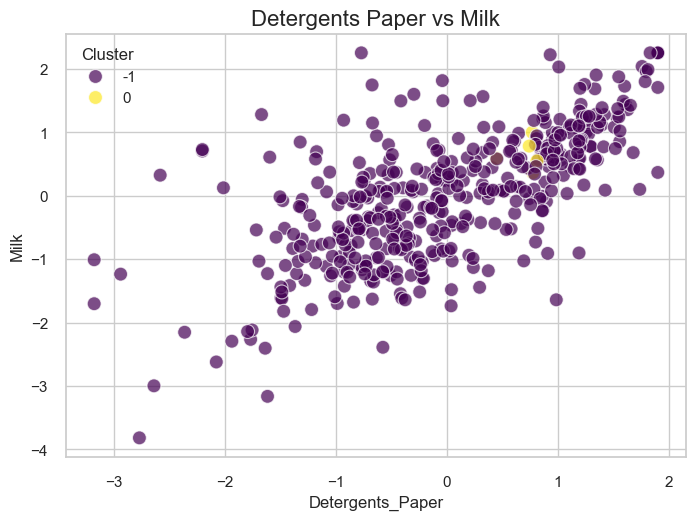

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use the custom function to visualize DBSCAN clustering results
# Use the corrected indexing for the columns in customers_scale DataFrame
plot(
    x=customers_scale['Detergents_Paper'],  # Scaled Detergents_Paper
    y=customers_scale['Milk'],             # Scaled Milk
    hue=customers_scale['labels_DBSCAN'],         # Cluster labels
    title='Detergents Paper vs Milk'
)

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

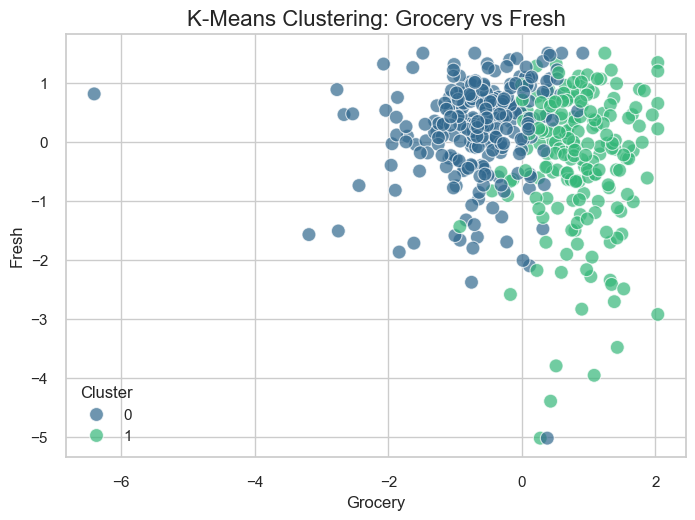

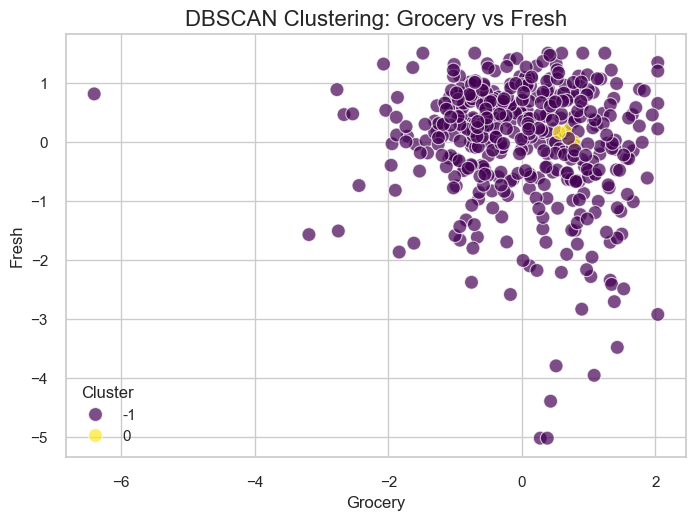

In [36]:
#Visualize Grocery as X and Fresh as y by labels and labels_DBSCAN respectively

# Visualize Grocery vs Fresh by labels (K-Means)
plot(
    x=customers_scale['Grocery'],          # Scaled Grocery
    y=customers_scale['Fresh'],            # Scaled Fresh
    hue=wholesale['labels'],               # K-Means cluster labels
    title='K-Means Clustering: Grocery vs Fresh'
)

# Visualize Grocery vs Fresh by labels_DBSCAN (DBSCAN)
plot(
    x=customers_scale['Grocery'],          # Scaled Grocery
    y=customers_scale['Fresh'],            # Scaled Fresh
    hue=customers_scale['labels_DBSCAN'],        #DBSCAN cluster labels
    title='DBSCAN Clustering: Grocery vs Fresh'
)

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

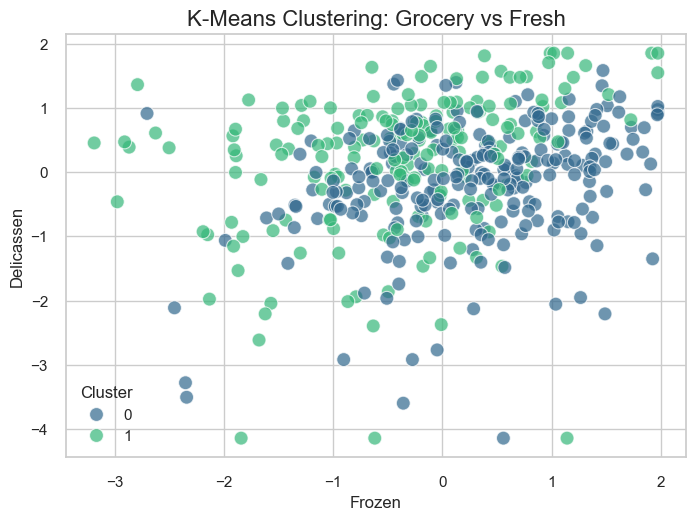

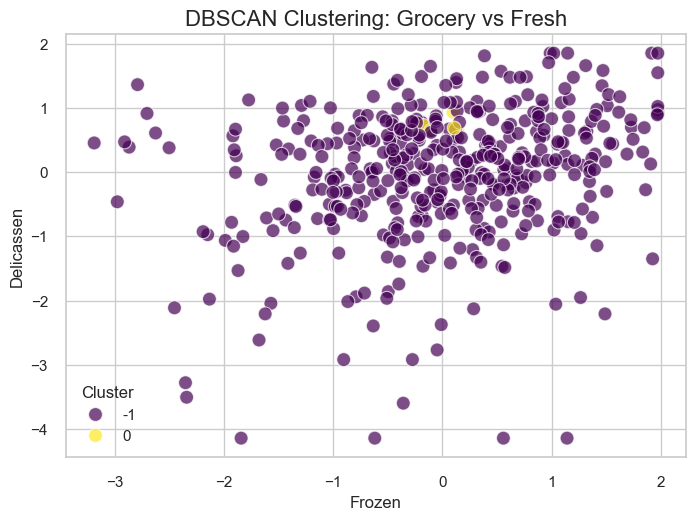

In [38]:
# Visualize Grocery vs Fresh by labels (K-Means)
plot(
    x=customers_scale['Frozen'],          # Scaled Grocery
    y=customers_scale['Delicassen'],            # Scaled Fresh
    hue=wholesale['labels'],               # K-Means cluster labels
    title='K-Means Clustering: Grocery vs Fresh'
)

# Visualize Grocery vs Fresh by labels_DBSCAN (DBSCAN)
plot(
    x=customers_scale['Frozen'],          # Scaled Grocery
    y=customers_scale['Delicassen'],            # Scaled Fresh
    hue=customers_scale['labels_DBSCAN'],        # DBSCAN cluster labels
    title='DBSCAN Clustering: Grocery vs Fresh'
)

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [39]:
# Group by K-Means labels and compute the mean for all columns
kmeans_group_means = customers_scale.groupby('labels').mean()
print("Mean Values by K-Means Labels:")
print(kmeans_group_means)

# Group by DBSCAN labels and compute the mean for all columns
dbscan_group_means = customers_scale.groupby('labels_DBSCAN').mean()
print("\nMean Values by DBSCAN Labels:")
print(dbscan_group_means)

Mean Values by K-Means Labels:
           Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen  \
labels                                                                         
0       0.219228 -0.611488 -0.651790  0.278162         -0.669766   -0.147796   
1      -0.285799  0.797175  0.849716 -0.362630          0.873150    0.192677   

        labels_DBSCAN  
labels                 
0           -1.000000  
1           -0.973822  

Mean Values by DBSCAN Labels:
                  Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
labels_DBSCAN                                                             
-1            -0.001344 -0.007572 -0.007642 -0.000144         -0.008165   
 0             0.116885  0.658756  0.664844  0.012529          0.710353   

               Delicassen    labels  
labels_DBSCAN                        
-1              -0.008349  0.427586  
 0               0.726337  1.000000  


Which algorithm appears to perform better?

**Your observations here**

- 

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [28]:
# Your code here:

**Your comment here**

- 

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [29]:
# Your code here

**Your comment here**

- 